<a href="https://colab.research.google.com/github/Keshav1516/ai-image-generator/blob/main/AI_Image_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install diffusers transformers accelerate torch torchvision safetensors

In [3]:
#let’s prepare the pipeline for AI Image Generation using Diffusion Models.

import torch
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler

device = "cuda" if torch.cuda.is_available() else ("mps" if torch.backends.mps.is_available() else "cpu")

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16 if device=="cuda" else torch.float32)

pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

if device == "cuda":
    pipe = pipe.to(device)
    pipe.enable_attention_slicing()
else:
    pipe.to(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
# Prompt through which we are creating the image.

prompt = "ultra-detailed image of a blue car with beuatiful girl, cinematic lighting, 35mm"
negative_prompt = "blurry, lowres, jpeg artifacts, extra fingers, text, watermark"

In [5]:
# let’s create the image with some key parameters

image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=30,   # 20–35 is a good range
    guidance_scale=7.5,       # 5–9 usually
    height=512,
    width=512,
    generator=torch.Generator(device=device).manual_seed(42)
).images[0]

image.save("generated_image.png")

  0%|          | 0/30 [00:00<?, ?it/s]

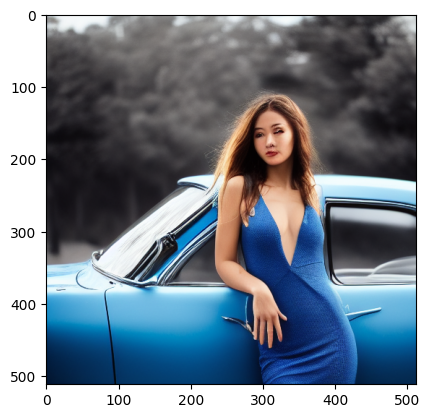

In [6]:
# out image that generated from text to image.

import matplotlib.pyplot as plt

plt.imshow(image)
plt.show()